In [1]:
!nvidia-smi

Wed Mar 26 09:10:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 15.2 MB/s eta 0:00:00a 0:00:01


In [4]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mucvK2QUbJpoJGP1RzY1")
project = rf.workspace("garbage-classification-q64nf").project("garbage-classification-vdovx")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to garbage--classification-1 in yolov9:: 100%|██████████| 5058/5058 [00:00<00:00, 9164.76it/s]


# YOlOv10

In [ ]:
from ultralytics import YOLO

# Load YOLOv10n model (pretrained)
model = YOLO("yolov10n.pt")

In [6]:
model.train(data="/kaggle/working/garbage--classification-1/data.yaml", epochs=50, imgsz=640 , batch=8)

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/kaggle/working/garbage--classification-1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 3.96MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 17.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/garbage--classification-1/train/labels... 1589 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1589/1589 [00:01<00:00, 1239.47it/s]

train: WARNING ⚠️ /kaggle/working/garbage--classification-1/train/images/cardboard13_jpg.rf.b2a65b28b691968600bf9ca491b3ec60.jpg: 1 duplicate labels removed


train: New cache created: /kaggle/working/garbage--classification-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/garbage--classification-1/valid/labels... 529 images, 0 backgrounds, 0 corrupt: 100%|██████████| 529/529 [00:00<00:00, 998.14it/s] 

val: New cache created: /kaggle/working/garbage--classification-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.55G      1.211      8.148      2.492         10        640: 100%|██████████| 199/199 [00:33<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  7.07it/s]


                   all        529        530      0.403      0.327      0.239      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.78G      1.389      6.131      2.566         11        640: 100%|██████████| 199/199 [00:30<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.24it/s]


                   all        529        530       0.43      0.389      0.294      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.78G      1.462      5.106      2.596         10        640: 100%|██████████| 199/199 [00:30<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]


                   all        529        530      0.537      0.368      0.317       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.78G      1.427      4.216      2.551         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.36it/s]


                   all        529        530      0.296      0.355      0.267      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.78G      1.406      3.698      2.517         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.13it/s]

                   all        529        530      0.369      0.504      0.468       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.78G      1.323      3.349      2.456         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        529        530      0.385      0.462      0.417      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.78G      1.322      3.048       2.46         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.31it/s]

                   all        529        530      0.482      0.604      0.565      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.78G       1.32      2.968      2.468         17        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        529        530      0.413      0.534      0.466      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.78G      1.251      2.754      2.407         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.57it/s]

                   all        529        530      0.535      0.609      0.606      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.78G      1.206      2.663      2.381         11        640: 100%|██████████| 199/199 [00:30<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.50it/s]

                   all        529        530      0.557      0.608      0.625      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.78G      1.231      2.455      2.408          9        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]

                   all        529        530      0.547      0.605      0.623      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.78G      1.204      2.454      2.375         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.41it/s]

                   all        529        530      0.511      0.663      0.625      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.78G      1.205      2.327      2.366         15        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.41it/s]

                   all        529        530      0.607      0.665       0.69      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.78G      1.169      2.302      2.369         15        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.67it/s]

                   all        529        530      0.588      0.679      0.691      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.78G      1.143      2.286      2.345          9        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        529        530      0.632      0.573      0.651       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.78G      1.153      2.184      2.342         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.41it/s]

                   all        529        530      0.537      0.676      0.662      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.78G      1.105      2.061      2.306          9        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.43it/s]

                   all        529        530      0.639      0.711      0.739      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.78G      1.105      2.075      2.312         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.28it/s]

                   all        529        530      0.662      0.613      0.694      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.78G      1.109      1.956      2.319         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.50it/s]

                   all        529        530      0.668       0.79      0.784      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.78G      1.081      1.966      2.292         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.67it/s]

                   all        529        530      0.657      0.754      0.738      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.78G      1.035      1.924      2.254         10        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.81it/s]

                   all        529        530      0.714      0.733      0.784      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.78G      1.045      1.841      2.284          6        640: 100%|██████████| 199/199 [00:30<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.51it/s]

                   all        529        530       0.72      0.713      0.807      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.78G      1.058      1.811      2.266         15        640: 100%|██████████| 199/199 [00:30<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.91it/s]

                   all        529        530      0.695      0.799      0.797      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.78G      1.062      1.862      2.285         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.74it/s]

                   all        529        530      0.742      0.734        0.8      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.78G      1.027      1.727      2.248         16        640: 100%|██████████| 199/199 [00:30<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.86it/s]

                   all        529        530      0.742      0.749      0.827      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.78G      1.002      1.717      2.243         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.75it/s]

                   all        529        530      0.725        0.7      0.768      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.78G     0.9958      1.703      2.246         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.54it/s]

                   all        529        530      0.757      0.742      0.801      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.78G     0.9646      1.664      2.214         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.57it/s]

                   all        529        530      0.725       0.71      0.794      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.78G     0.9553      1.666      2.209         14        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        529        530      0.763      0.782      0.855      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.78G     0.9717      1.628      2.219         12        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.72it/s]

                   all        529        530      0.777      0.813      0.865      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.78G     0.9394      1.533      2.199         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.41it/s]

                   all        529        530      0.766      0.806      0.856      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.78G     0.9289      1.596      2.195         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.46it/s]

                   all        529        530      0.807      0.765      0.853      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.78G     0.9215      1.516      2.196         10        640: 100%|██████████| 199/199 [00:31<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.46it/s]

                   all        529        530       0.86      0.792      0.889      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.78G      0.926      1.433      2.192         10        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.06it/s]

                   all        529        530      0.814      0.819       0.89      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.78G     0.9188       1.44      2.186         15        640: 100%|██████████| 199/199 [00:30<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.60it/s]

                   all        529        530      0.769      0.809      0.872      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.78G     0.9043      1.408      2.181         15        640: 100%|██████████| 199/199 [00:30<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.48it/s]

                   all        529        530      0.792      0.851      0.871      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.78G     0.9133       1.42      2.184         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.61it/s]

                   all        529        530      0.816      0.806      0.863      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.78G     0.8813       1.38      2.152         11        640: 100%|██████████| 199/199 [00:30<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.98it/s]

                   all        529        530      0.843      0.873      0.901      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.78G     0.8635      1.341      2.169         12        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.66it/s]

                   all        529        530       0.83      0.825      0.884      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.78G      0.871      1.294      2.173         13        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.99it/s]

                   all        529        530      0.819       0.83      0.891      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.78G     0.6033      1.052      2.039          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.74it/s]

                   all        529        530       0.87      0.814      0.906      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.78G     0.5552      0.895      1.995          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]

                   all        529        530      0.847      0.847       0.91      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.78G     0.5578     0.8449      1.969          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.61it/s]

                   all        529        530      0.843      0.862      0.909      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.78G     0.5301     0.8544      1.964          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.29it/s]

                   all        529        530      0.861      0.827      0.895       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.78G     0.5355      0.739      1.965          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.52it/s]

                   all        529        530      0.853      0.878      0.905      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.78G     0.4901     0.7714      1.939          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.47it/s]

                   all        529        530      0.822      0.891       0.92      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.78G     0.5132     0.7189      1.936          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.01it/s]

                   all        529        530      0.871       0.84      0.926      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.78G     0.5004     0.6715      1.924          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.48it/s]

                   all        529        530      0.842      0.902       0.92      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.78G     0.4988     0.6318      1.929          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.78it/s]

                   all        529        530      0.847      0.885      0.914      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.78G      0.477     0.6132      1.927          5        640: 100%|██████████| 199/199 [00:30<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.88it/s]

                   all        529        530       0.87      0.871      0.912      0.881



50 epochs completed in 0.490 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 125 layers, 2,696,756 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.69it/s]


                   all        529        530       0.87      0.841      0.926      0.889
              cardoard         78         78      0.947      0.922      0.986       0.97
                 glass        112        112      0.877      0.831      0.935      0.893
                 metal         88         89      0.926      0.849       0.95       0.92
                 paper        134        134      0.915      0.918      0.972      0.935
               plastic         93         93      0.912      0.817      0.927      0.897
                 trash         24         24      0.641      0.708      0.788      0.719


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785328d0ce80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [8]:
trained_model = model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

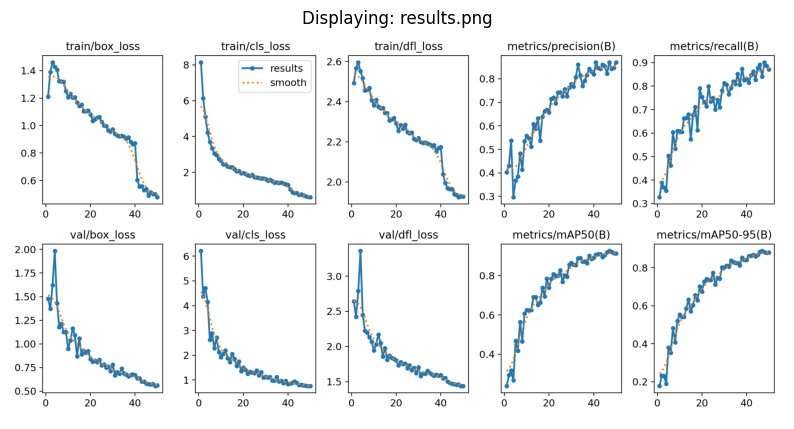

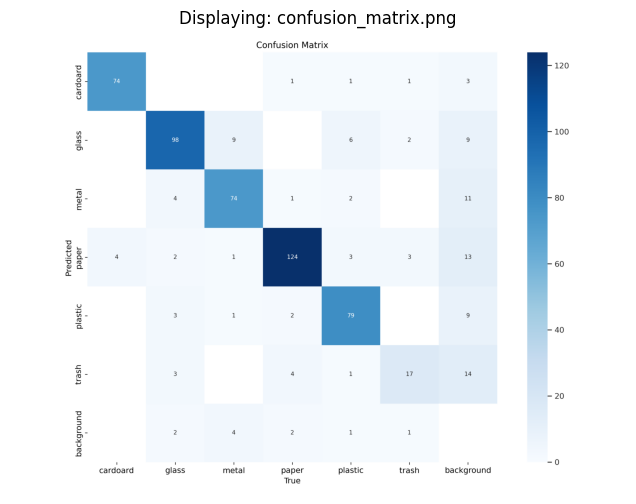

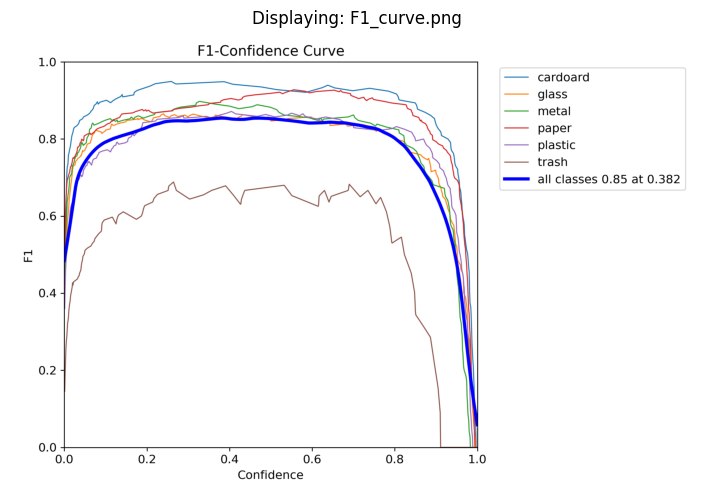

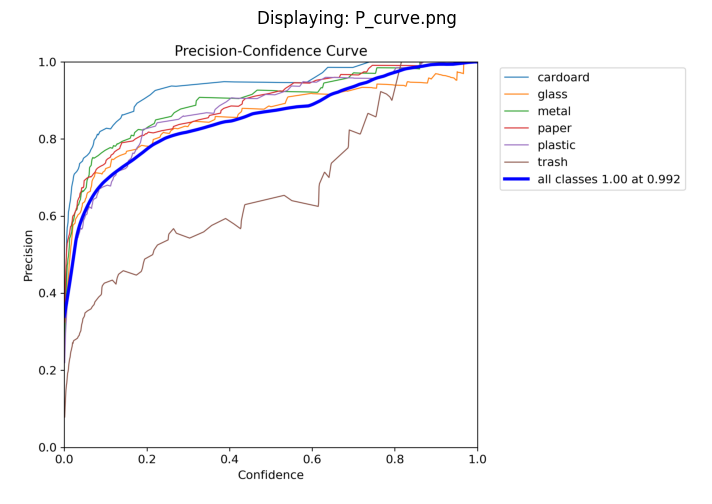

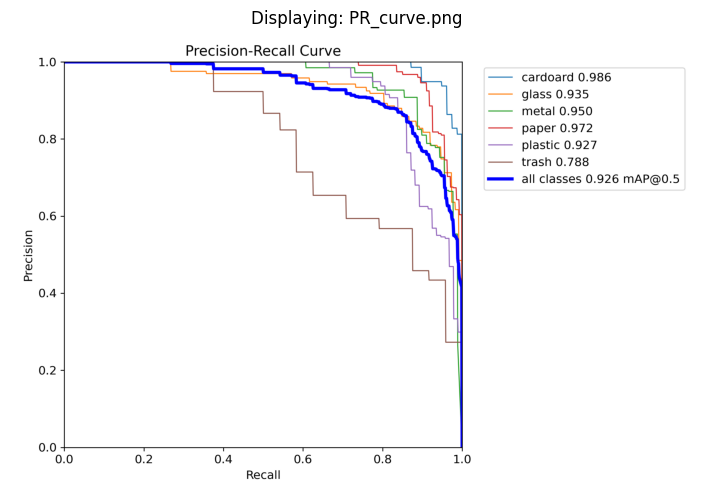

In [10]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Define the directory where the plots are saved
results_dir = "/kaggle/working/runs/detect/train"



# List of plot files to display
plot_files = [
    "results.png",                # Overall training results plot
    "confusion_matrix.png",       # Confusion matrix plot
    "F1_curve.png", # Precision-recall curve plot
    "P_curve.png",              # Loss plot
    "PR_curve.png",             # Train loss plot
]

# Iterate over each plot file and display it using matplotlib
for plot_file in plot_files:
    plot_path = os.path.join(results_dir, plot_file)
    
    # Check if the plot file exists
    if os.path.exists(plot_path):
        # Load the plot image
        img = mpimg.imread(plot_path)
        
        # Display the image
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Displaying: {plot_file}")
        plt.show()
    else:
        print(f"{plot_file} not found in {results_dir}")


# YOLOV9

In [12]:
!yolo task=detect  mode=train data="/kaggle/working/garbage--classification-1/data.yaml" model=yolov9c.yaml epochs=50 imgsz=640 batch=16

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/kaggle/working/garbage--classification-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [14]:
from IPython.display import Image, display


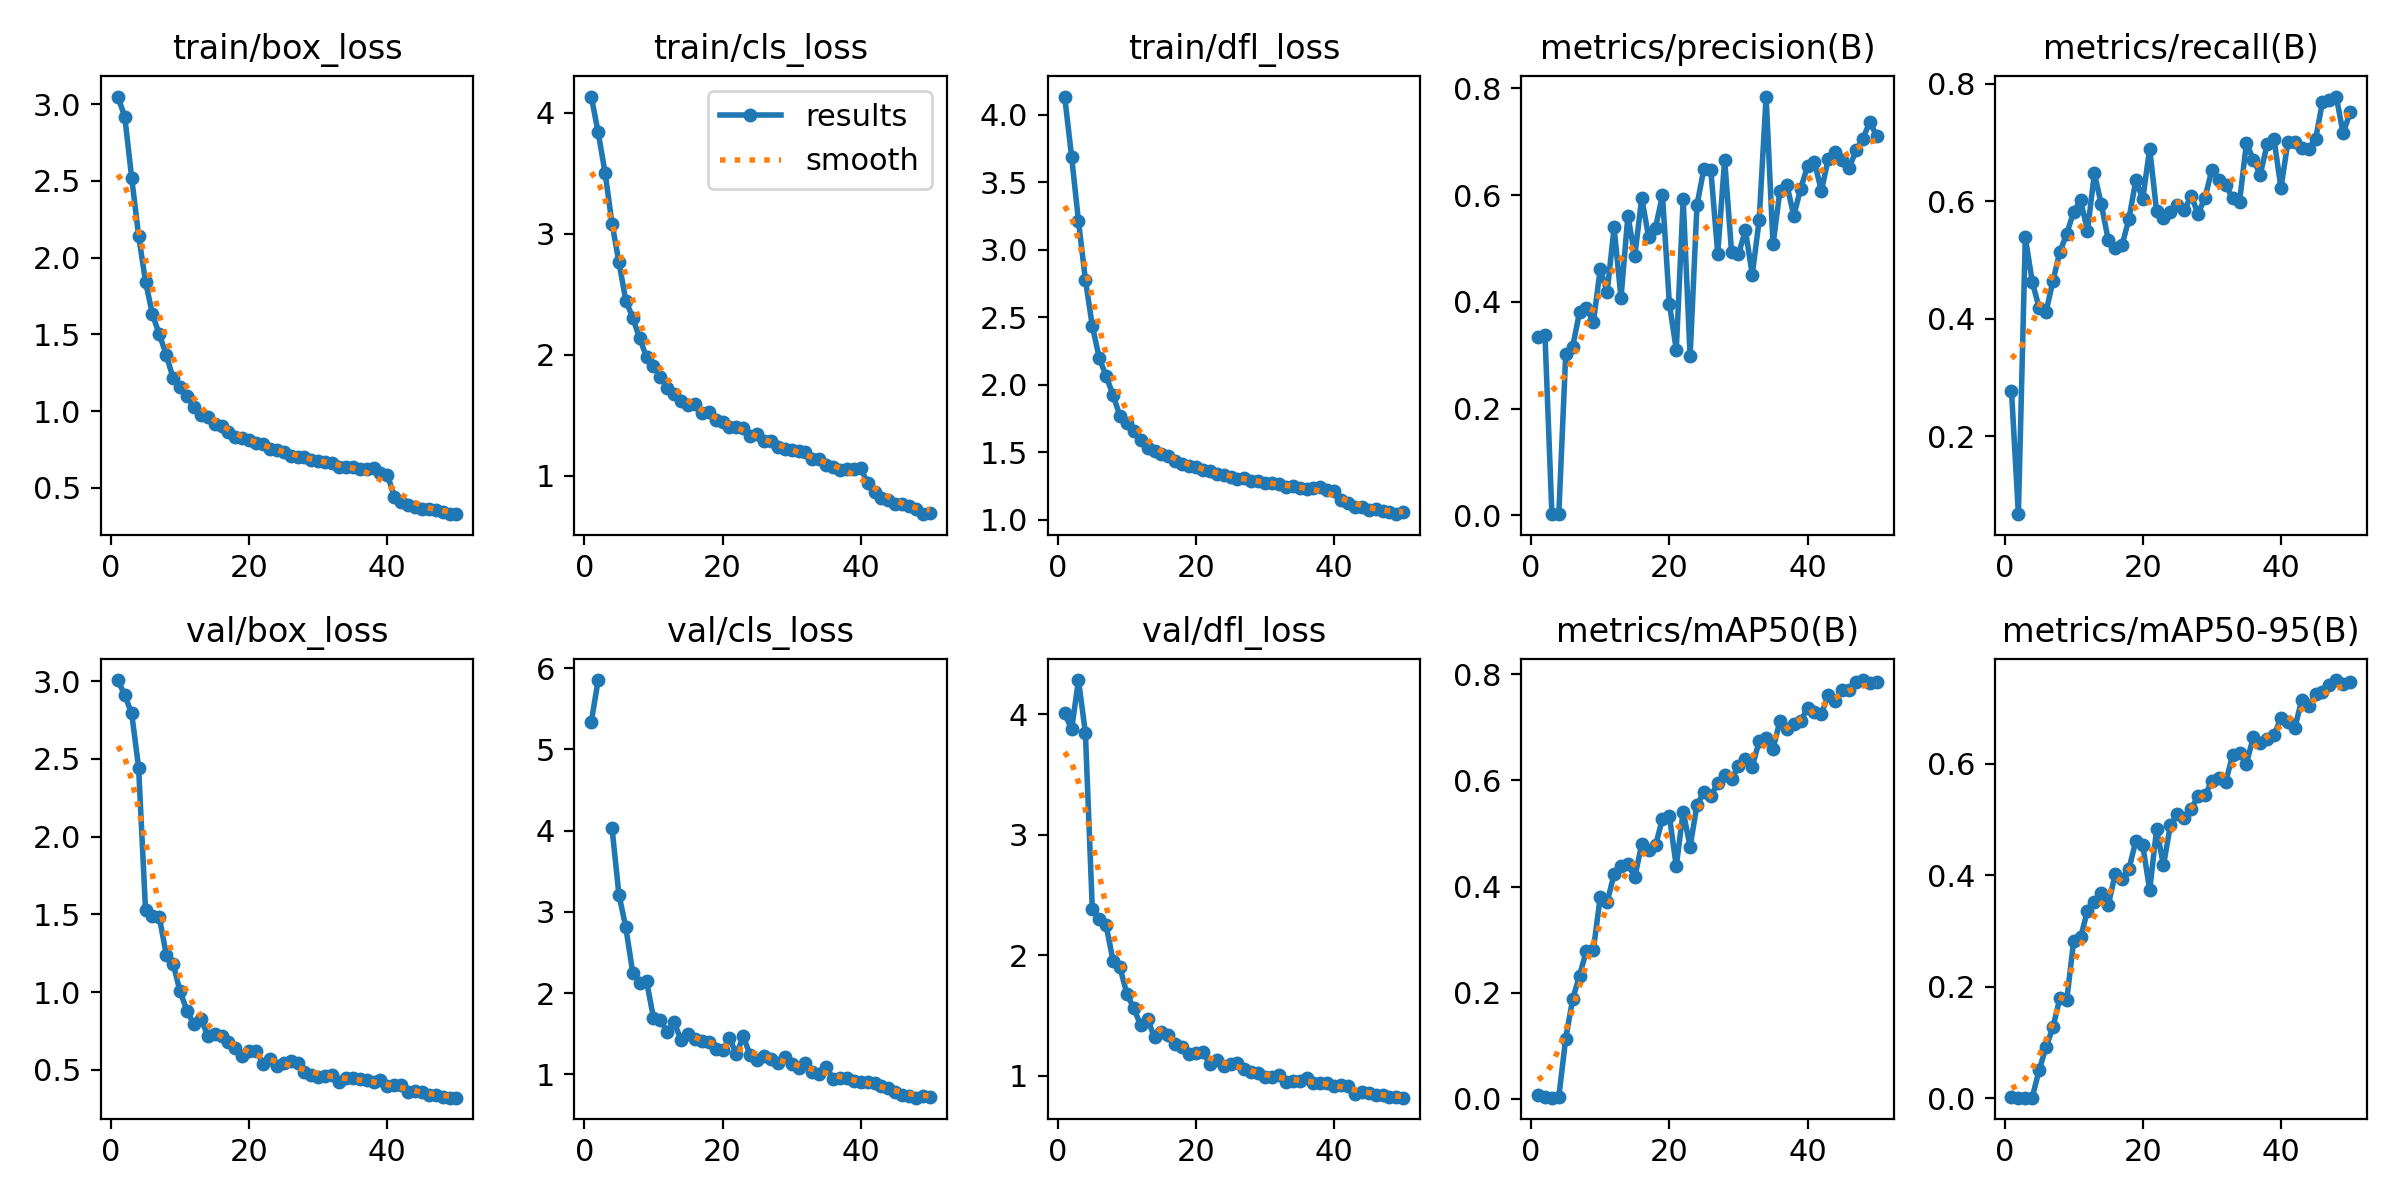

In [ ]:
display(Image(filename=f"/kaggle/working/runs/detect/train3/results.png", width=1000))

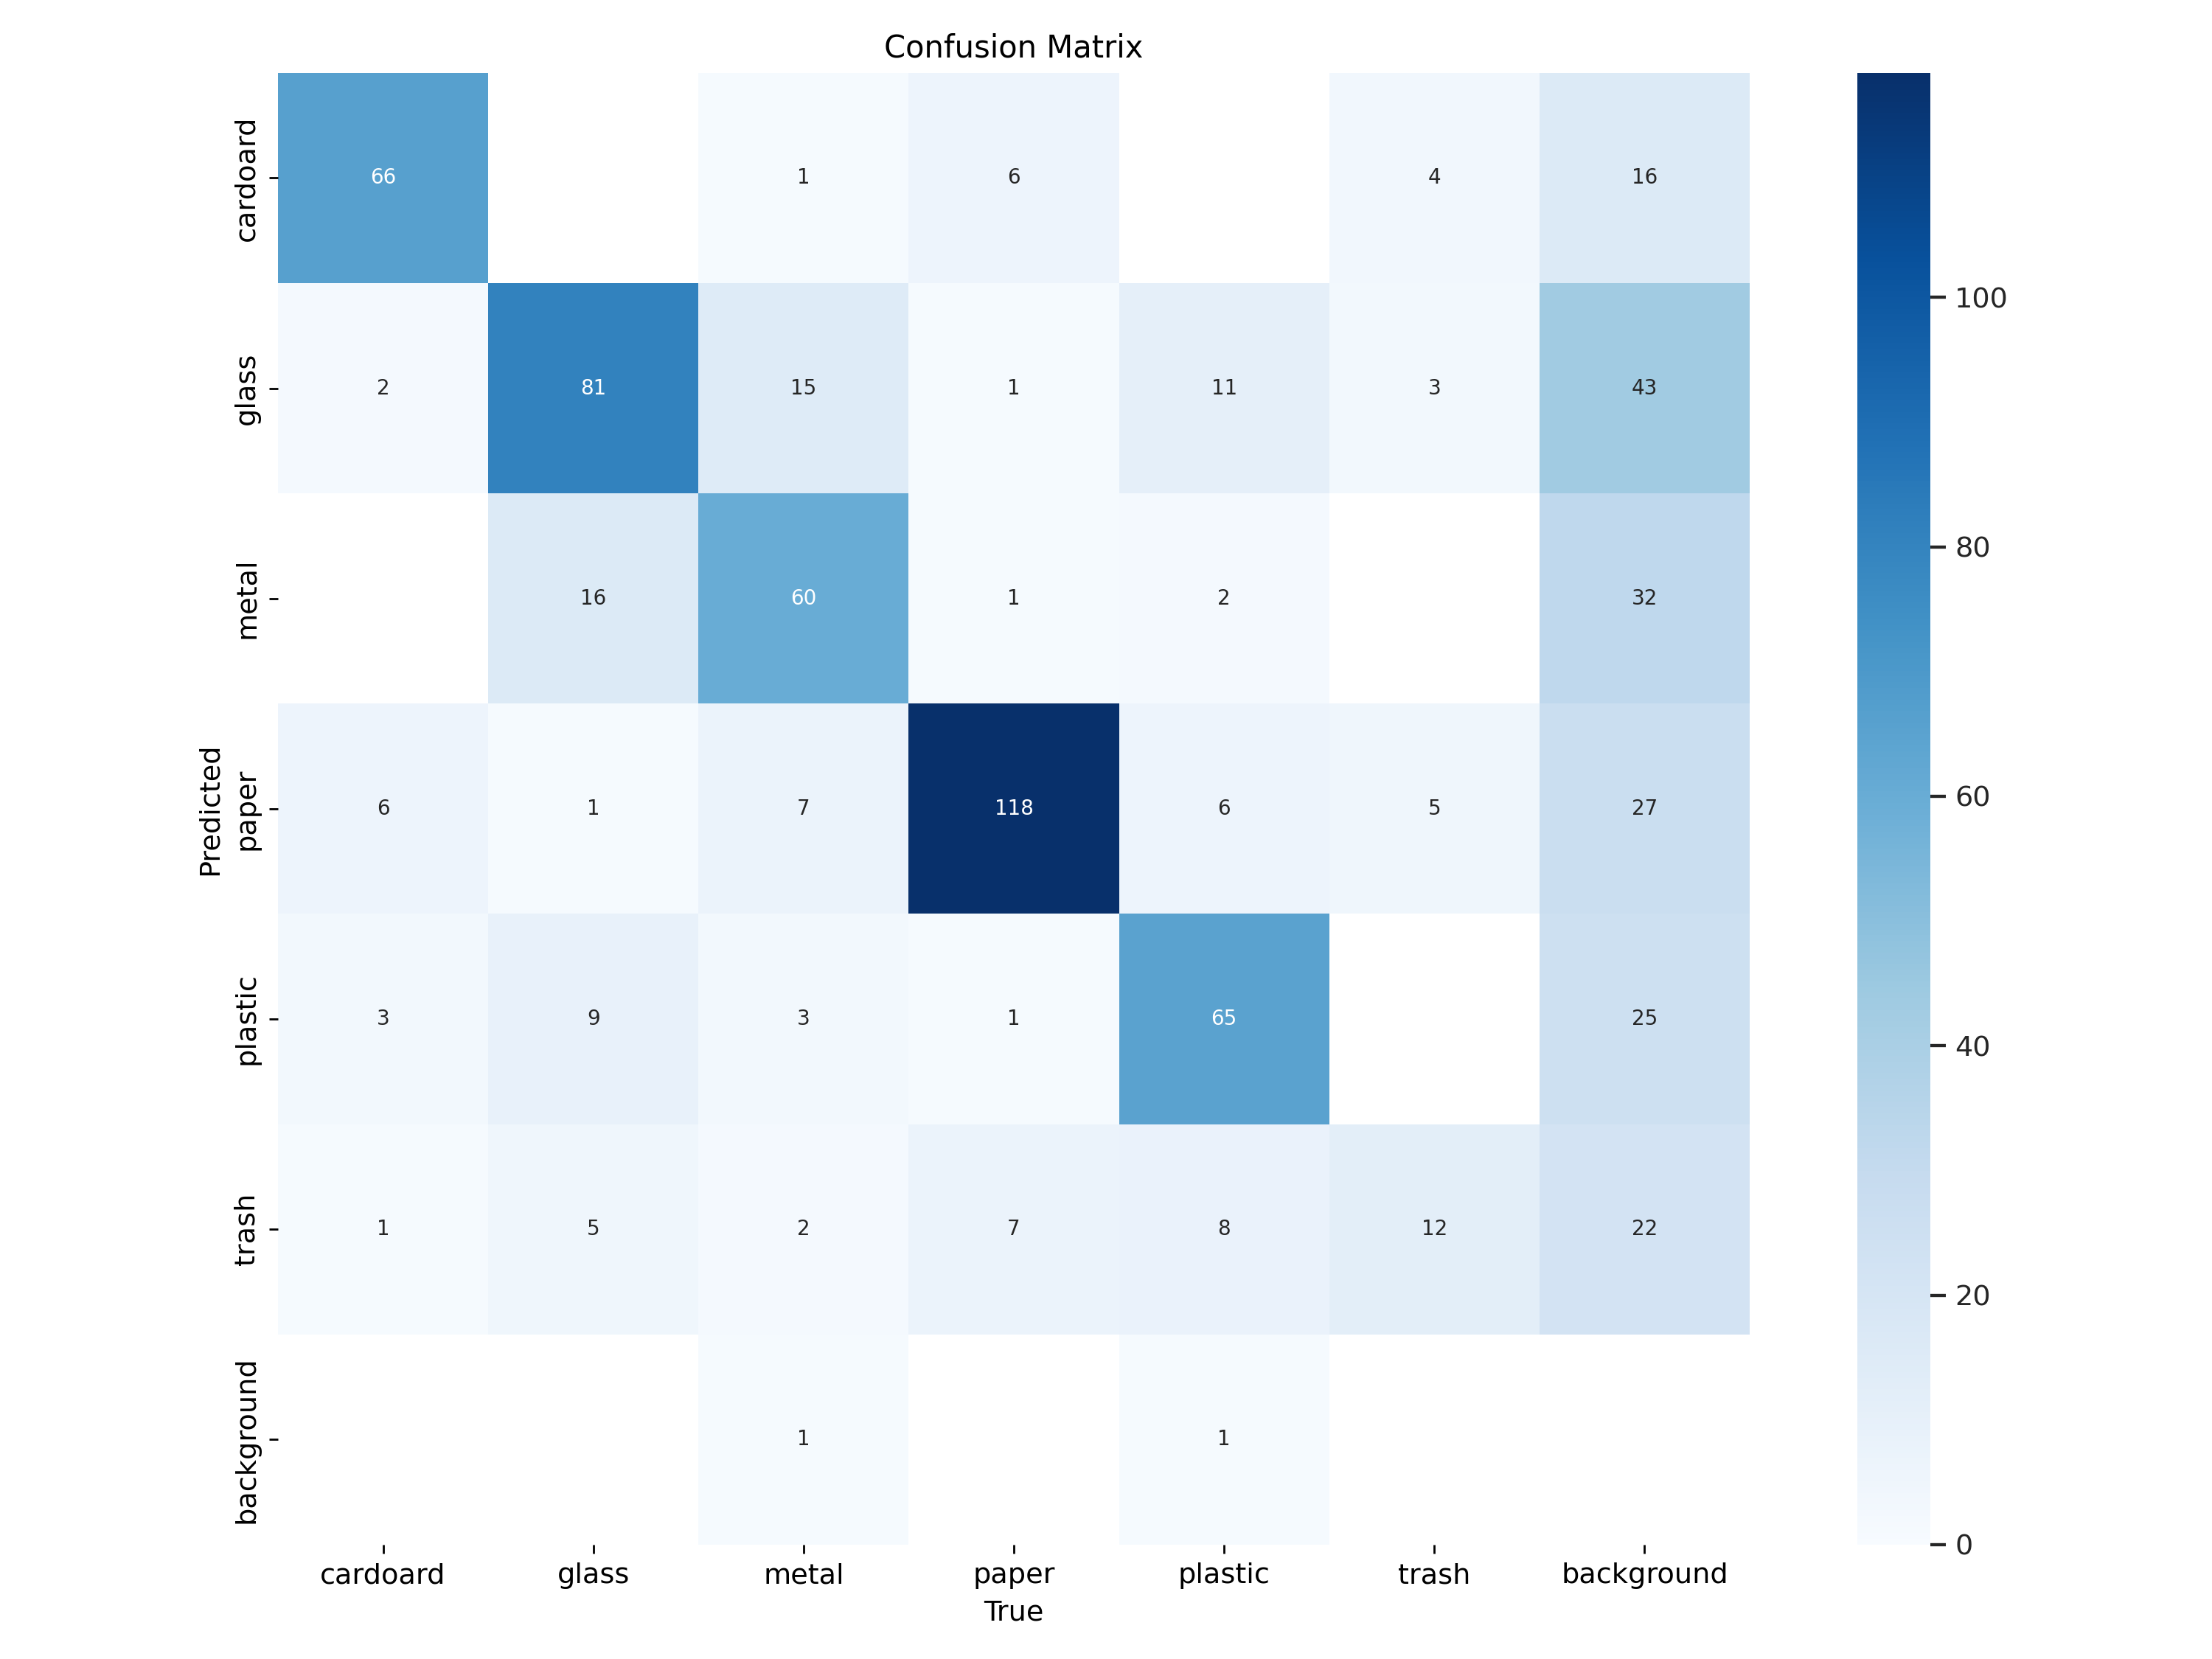

In [17]:
display(Image(filename=f"/kaggle/working/runs/detect/train3/confusion_matrix.png", width=1000))

In [19]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train3/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/garbage--classification-1/test/images

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 156 layers, 25,323,874 parameters, 0 gradients, 102.3 GFLOPs

image 1/405 /kaggle/working/garbage--classification-1/test/images/cardboard100_jpg.rf.9bbc42a16e949d54468a829c236a0c6c.jpg: 640x640 1 paper, 23.4ms
image 2/405 /kaggle/working/garbage--classification-1/test/images/cardboard102_jpg.rf.21a968bb43c1a6994a9b433a18c931b5.jpg: 640x640 1 paper, 23.7ms
image 3/405 /kaggle/working/garbage--classification-1/test/images/cardboard105_jpg.rf.52662ee6e13af74c4aadd0f4e8e27725.jpg: 640x640 1 cardoard, 23.8ms
image 4/405 /kaggle/working/garbage--classification-1/test/images/cardboard10_jpg.rf.166c8331db7c98c4eecfac3589f8e281.jpg: 640x640 1 cardoard, 23.6ms
image 5/405 /kaggle/working/garbage--classification-1/test/images/cardboard115_jpg.rf.96c289a8ee81bc1c70d0adb7068ca030.jpg: 640x640 1 cardoard, 23.7ms
image 6/405 /kaggle/working/garbage--classification-1/test/images/cardb

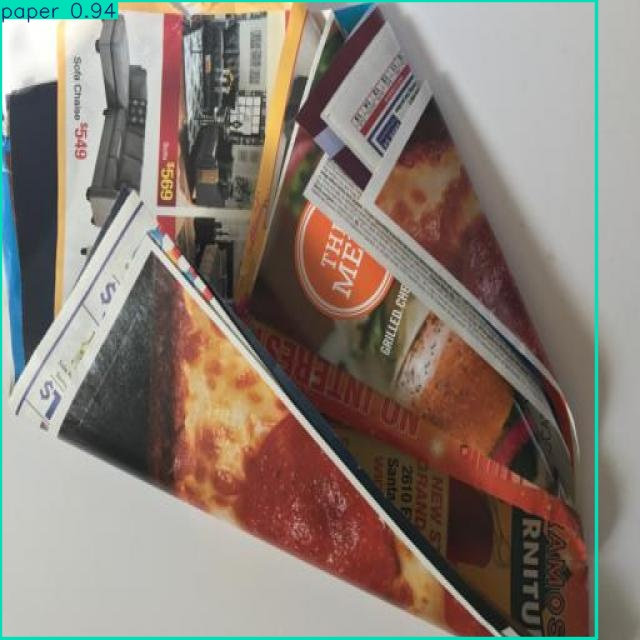

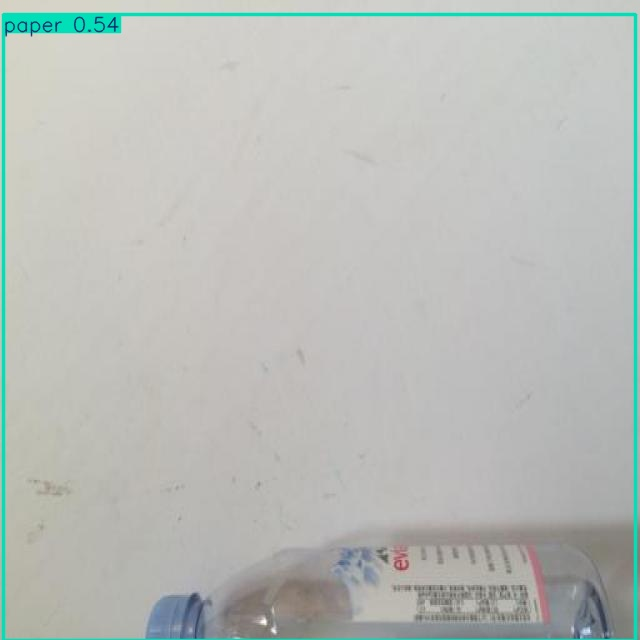

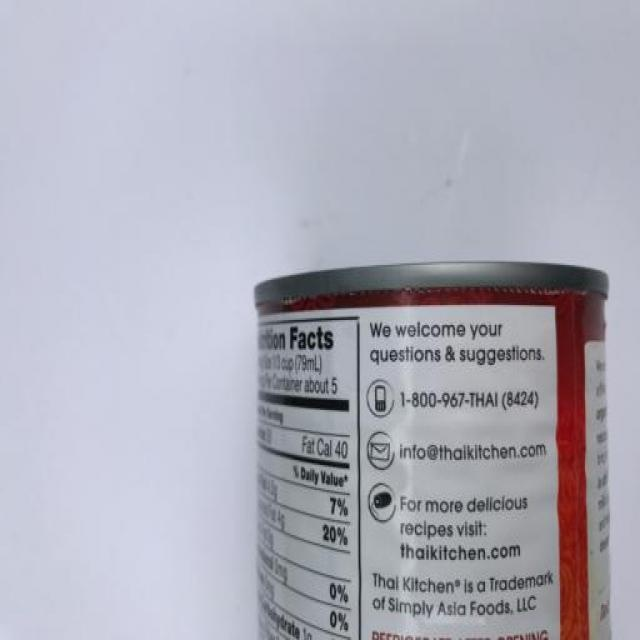

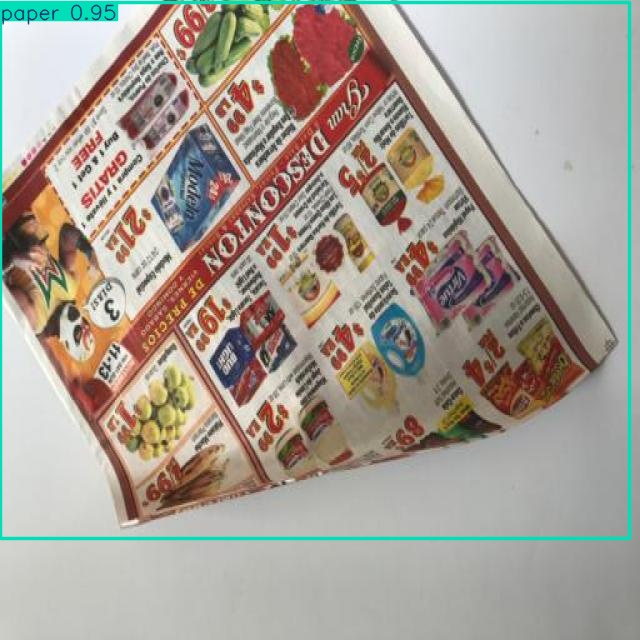

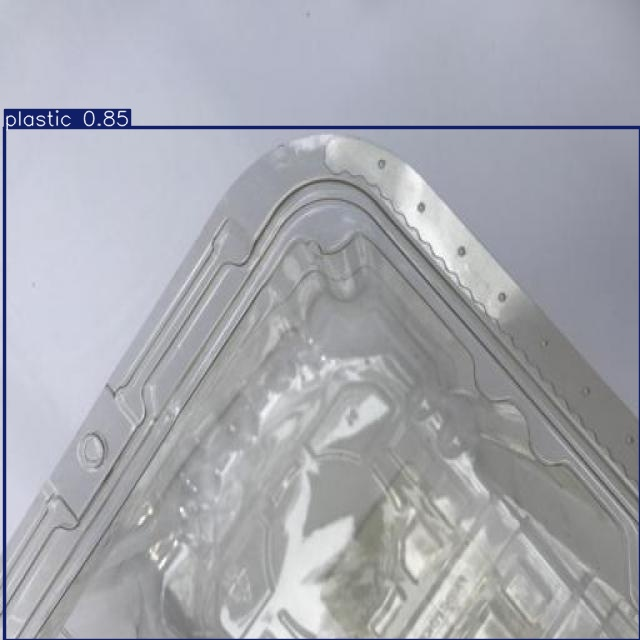

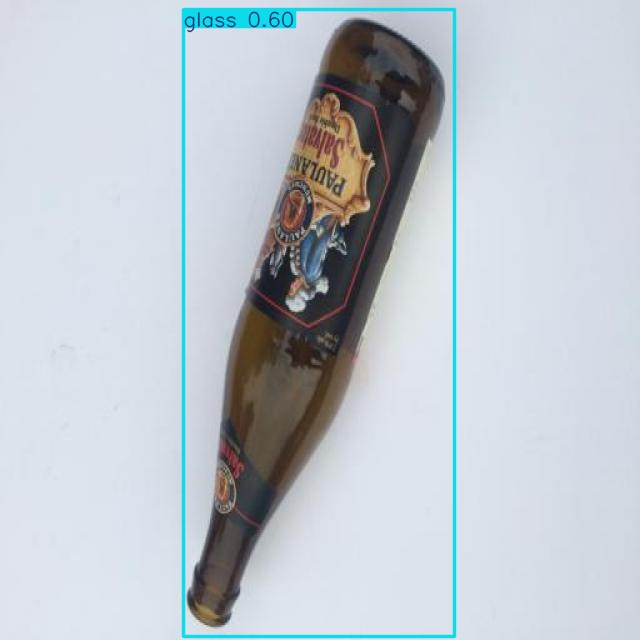

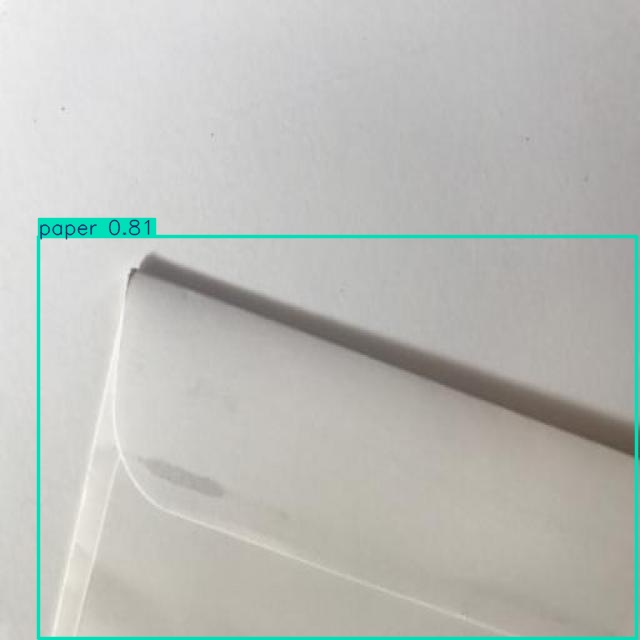

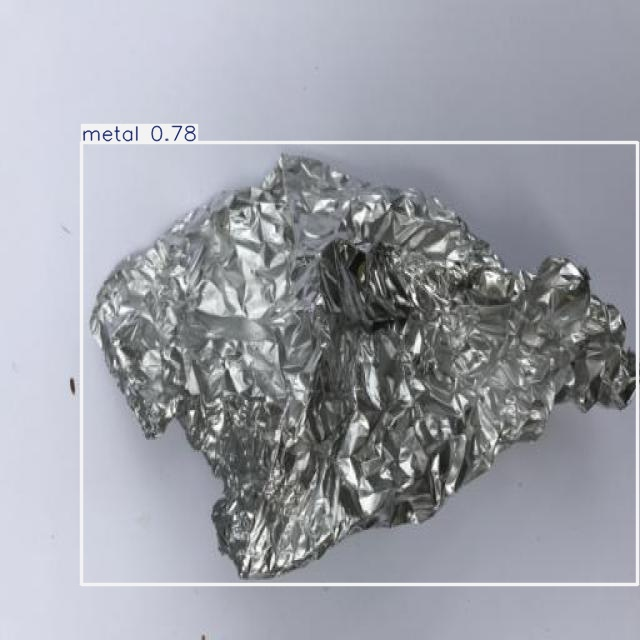

In [20]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display


for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg")[2:10] :#assuming JPG
    print("\n")
    display(Image(filename=imageName))

# YOLOV8

In [21]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

results = model.train(
    data="/kaggle/working/garbage--classification-1/data.yaml",  
    epochs=50,                    
    imgsz=640,                    
    batch=16,                    
    project="yolov8-kaggle-training", 
    name="output",   
    cache=True                    
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.4MB/s]


Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/garbage--classification-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8-kaggle-training, name=output, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /kaggle/working/garbage--classification-1/train/labels.cache... 1589 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1589/1589 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/garbage--classification-1/train/images/cardboard13_jpg.rf.b2a65b28b691968600bf9ca491b3ec60.jpg: 1 duplicate labels removed
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (1.8GB RAM): 100%|██████████| 1589/1589 [00:01<00:00, 885.58it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/garbage--classification-1/valid/labels.cache... 529 images, 0 backgrounds, 0 corrupt: 100%|██████████| 529/529 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.6GB RAM): 100%|██████████| 529/529 [00:01<00:00, 404.51it/s]


Plotting labels to yolov8-kaggle-training/output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolov8-kaggle-training/output
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G     0.7123      2.451      1.272         11        640: 100%|██████████| 100/100 [00:19<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.44it/s]


                   all        529        530      0.349      0.527      0.326      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.57G     0.7081      1.631      1.251         15        640: 100%|██████████| 100/100 [00:18<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.58it/s]


                   all        529        530      0.389      0.497      0.405      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G     0.7324      1.416      1.255         12        640: 100%|██████████| 100/100 [00:18<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.88it/s]


                   all        529        530      0.392        0.5      0.358      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G     0.7328      1.252      1.245         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.98it/s]

                   all        529        530      0.277      0.502      0.282      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G      0.712      1.155      1.235         18        640: 100%|██████████| 100/100 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]

                   all        529        530      0.376      0.536      0.376      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.57G     0.6568      1.027      1.195         15        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.20it/s]

                   all        529        530      0.373      0.609      0.521      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G     0.6371     0.9516      1.184         14        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.99it/s]

                   all        529        530       0.46      0.638      0.536      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.57G     0.6349     0.9048      1.184         13        640: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]

                   all        529        530      0.421      0.718      0.542      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.57G     0.6198     0.8368       1.17         12        640: 100%|██████████| 100/100 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]

                   all        529        530      0.514      0.711      0.613      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.57G     0.6006     0.8049      1.156          9        640: 100%|██████████| 100/100 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.96it/s]

                   all        529        530      0.474      0.506      0.467      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.57G      0.599     0.7978      1.159         15        640: 100%|██████████| 100/100 [00:18<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]

                   all        529        530      0.474      0.681      0.576      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.57G     0.5709     0.7531      1.135          8        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]

                   all        529        530      0.436      0.571        0.5      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.57G     0.5728     0.7229      1.137         11        640: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]

                   all        529        530      0.551       0.67      0.622      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.57G     0.5634     0.7193      1.132         13        640: 100%|██████████| 100/100 [00:18<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]

                   all        529        530      0.578      0.668      0.671      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.57G     0.5543      0.699      1.125         12        640: 100%|██████████| 100/100 [00:18<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.41it/s]

                   all        529        530      0.579      0.676       0.65      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.57G     0.5517     0.6671      1.122         13        640: 100%|██████████| 100/100 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.33it/s]

                   all        529        530      0.711      0.693      0.764       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.57G     0.5437     0.6701      1.119         14        640: 100%|██████████| 100/100 [00:18<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        529        530      0.529      0.779      0.707      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.57G     0.5383     0.6197       1.11         14        640: 100%|██████████| 100/100 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]

                   all        529        530      0.561      0.745       0.74      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.57G     0.5194     0.6121      1.101         10        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]

                   all        529        530       0.52      0.695      0.656      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.57G      0.515     0.6004        1.1         15        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.31it/s]

                   all        529        530      0.716      0.771      0.796      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.57G     0.5064     0.5883      1.096         10        640: 100%|██████████| 100/100 [00:18<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.43it/s]

                   all        529        530      0.661      0.729      0.749      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.57G     0.4875     0.5553      1.081         15        640: 100%|██████████| 100/100 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.41it/s]

                   all        529        530      0.686      0.717      0.753       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.57G      0.489     0.5585      1.086         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]

                   all        529        530      0.761       0.76      0.837       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.57G     0.4884     0.5501      1.081         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]

                   all        529        530      0.635       0.79      0.816      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.57G     0.4651     0.5198      1.065         14        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.44it/s]

                   all        529        530      0.655      0.743      0.719      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.57G     0.4644     0.5185      1.067         11        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]

                   all        529        530      0.704      0.756       0.78      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.57G     0.4576     0.5042      1.067         12        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.15it/s]

                   all        529        530      0.719      0.726      0.811      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.57G     0.4572     0.4957      1.067         11        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]

                   all        529        530      0.676      0.764      0.788      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.57G      0.445     0.4857      1.054          8        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]

                   all        529        530      0.714      0.757      0.801      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.57G     0.4279     0.4829       1.05         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]

                   all        529        530      0.672       0.76      0.804      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.57G     0.4262     0.4815      1.044         14        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]

                   all        529        530      0.769      0.766      0.836      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.57G     0.4299     0.4714      1.053         11        640: 100%|██████████| 100/100 [00:18<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]

                   all        529        530       0.76      0.797      0.859      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.57G     0.4158     0.4483      1.046         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.44it/s]

                   all        529        530      0.715      0.794      0.808      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.57G     0.4249     0.4515      1.049         11        640: 100%|██████████| 100/100 [00:17<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.49it/s]

                   all        529        530       0.71      0.806      0.834      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.57G     0.4055     0.4416       1.03         15        640: 100%|██████████| 100/100 [00:18<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.36it/s]

                   all        529        530       0.77      0.792      0.837      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.57G     0.3849     0.4287      1.021         13        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.55it/s]

                   all        529        530      0.761      0.831      0.884      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.57G     0.3808     0.4266      1.021         10        640: 100%|██████████| 100/100 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.47it/s]

                   all        529        530      0.781       0.77      0.851      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.57G     0.3905     0.4085      1.023          7        640: 100%|██████████| 100/100 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.46it/s]

                   all        529        530      0.763      0.767       0.87      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.57G     0.3789     0.4013      1.023         12        640: 100%|██████████| 100/100 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]

                   all        529        530      0.812      0.835      0.907      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.57G     0.3733     0.4076      1.019         13        640: 100%|██████████| 100/100 [00:17<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]

                   all        529        530      0.813      0.762      0.884      0.805


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.57G     0.3839     0.8802      1.091          5        640: 100%|██████████| 100/100 [00:18<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.40it/s]

                   all        529        530      0.818      0.813      0.895      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.57G      0.323     0.5965      1.043          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.55it/s]

                   all        529        530      0.771      0.839      0.878      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.57G     0.3019     0.5471      1.011          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.54it/s]

                   all        529        530      0.828      0.857       0.92       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.57G     0.2942     0.5172      1.014          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]

                   all        529        530      0.855       0.83      0.916      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.57G     0.2823     0.4613     0.9943          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.53it/s]

                   all        529        530      0.858      0.865      0.933      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.57G     0.2913     0.4637       1.01          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.39it/s]

                   all        529        530      0.898      0.865      0.941      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.57G     0.2682      0.447     0.9752          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.60it/s]

                   all        529        530      0.834      0.881      0.931      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.57G     0.2626     0.4176     0.9764          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.64it/s]

                   all        529        530      0.873      0.847      0.928      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.57G     0.2548     0.4038     0.9699          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.48it/s]

                   all        529        530      0.878      0.888      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.57G     0.2582     0.3846     0.9781          5        640: 100%|██████████| 100/100 [00:17<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.37it/s]

                   all        529        530      0.858      0.903      0.942      0.889



50 epochs completed in 0.292 hours.
Optimizer stripped from yolov8-kaggle-training/output/weights/last.pt, 6.3MB
Optimizer stripped from yolov8-kaggle-training/output/weights/best.pt, 6.3MB

Validating yolov8-kaggle-training/output/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.41it/s]


                   all        529        530      0.858      0.903      0.942      0.889
              cardoard         78         78      0.943      0.962      0.985      0.958
                 glass        112        112      0.853      0.884      0.946      0.892
                 metal         88         89      0.882      0.838      0.931      0.899
                 paper        134        134      0.862      0.963      0.978      0.934
               plastic         93         93      0.803      0.903      0.948      0.889
                 trash         24         24      0.807      0.871      0.863      0.761


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to yolov8-kaggle-training/output


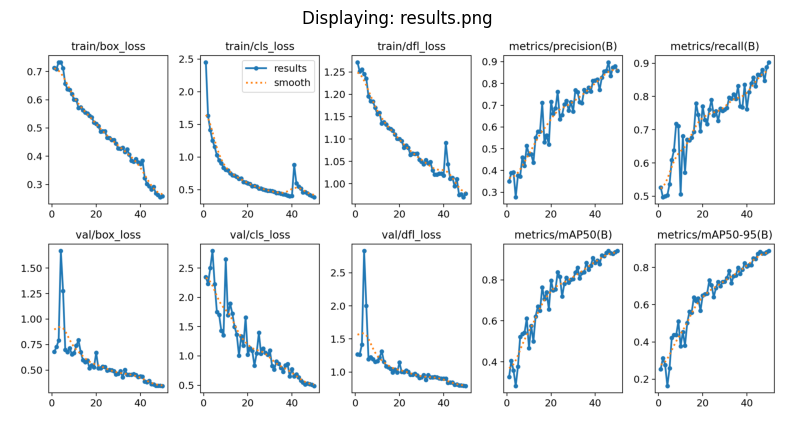

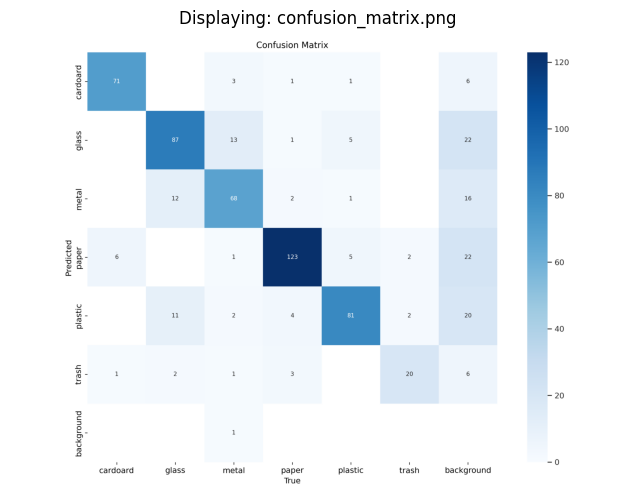

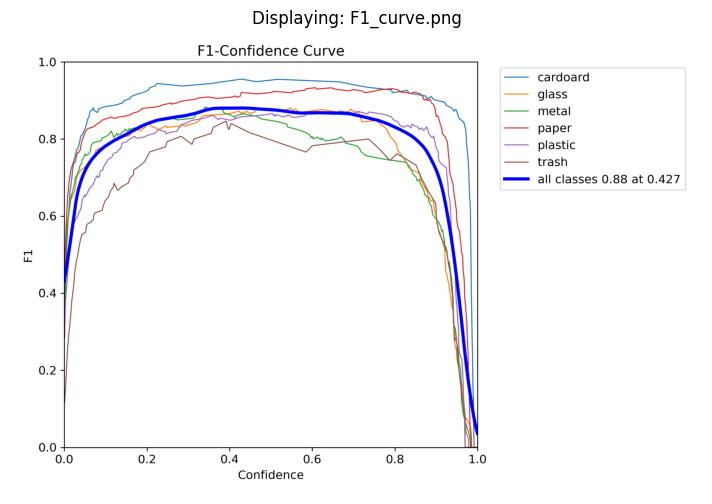

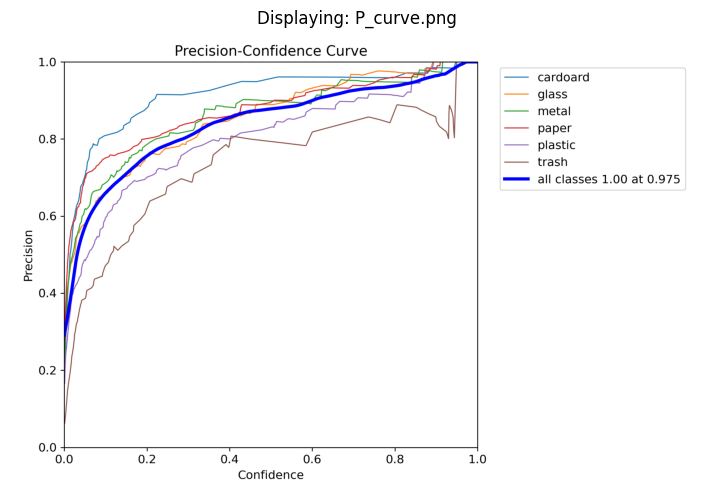

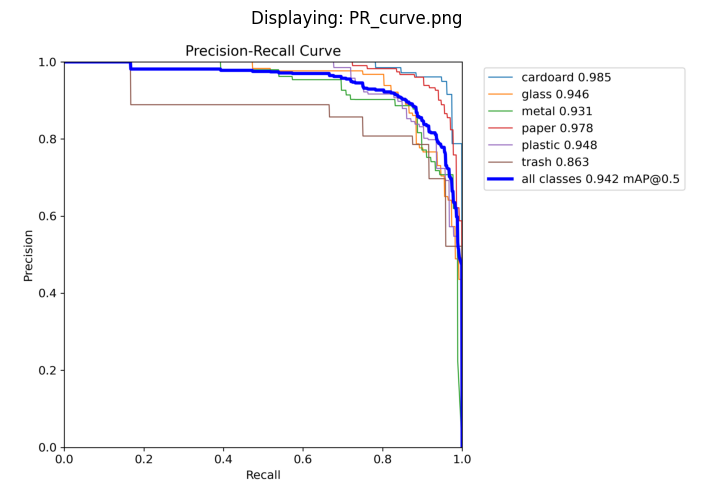

In [22]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Define the directory where the plots are saved
results_dir = "yolov8-kaggle-training/output"



# List of plot files to display
plot_files = [
    "results.png",                # Overall training results plot
    "confusion_matrix.png",       # Confusion matrix plot
    "F1_curve.png", # Precision-recall curve plot
    "P_curve.png",              # Loss plot
    "PR_curve.png",             # Train loss plot
]

# Iterate over each plot file and display it using matplotlib
for plot_file in plot_files:
    plot_path = os.path.join(results_dir, plot_file)
    
    # Check if the plot file exists
    if os.path.exists(plot_path):
        # Load the plot image
        img = mpimg.imread(plot_path)
        
        # Display the image
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Displaying: {plot_file}")
        plt.show()
    else:
        print(f"{plot_file} not found in {results_dir}")
